# Sampling strategies

In this activity, we are going to try a few different sampling strategies.

## The data

Let's start by revisiting our data again:

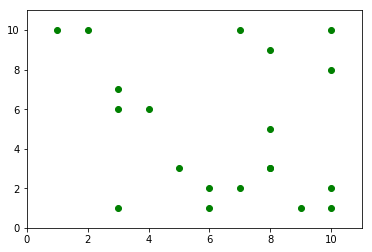

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import numpy as np
import matplotlib.pyplot as plt

# _o stands for 'original'
x_o = np.array([3,8,3,4,1,7,5,3,8,2,10,8,10,10,9,8,10,6,7,6])
y_o = np.array([7,3,1,6,10,10,3,6,5,10,10,9,8,2,1,3,1,1,2,2])

# Make a scatter plot and overlay with our equations
plt.scatter(x_o,y_o,c='green')

# Set the axes limits
plt.axis([0, 11, 0, 11])
x = np.array(range(0,12))
plt.show()

## Random sampling

Next, let's apply some sampling strategies. First, a random sample:

[ 7 10  5  6  3 18 13  2 14  8]
Selected x-values: [ 3  3  2 10  8 10  3 10  7 10]
Selected y-values: [ 1  7 10 10  3  2  6  1  2  8]


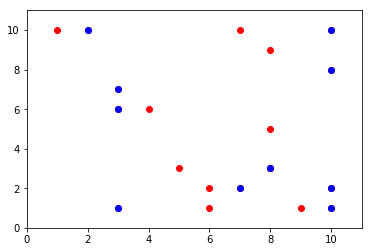

In [2]:
import random

np.random.seed(10)

indices = range(0,len(x_o))
print(np.random.choice(indices, 10, replace=False))
indices = np.random.choice(indices, 10, replace=False)

print('Selected x-values: '+str(x_o[indices]))
print('Selected y-values: '+str(y_o[indices]))

plt.scatter(x_o,y_o,c='red')
plt.scatter(x_o[indices],y_o[indices],c='blue')
plt.axis([0, 11, 0, 11])
plt.show()

The blue sampled ones seem to be spread out quite evenly - the random sampling has done its job!

## Maximum distance selection

Now, code a function that selects points based on the maximum distance calculation, use the average of all points in your growing sample to select new points:

In [3]:
# Use this function to calculate the Euclidean distance
from scipy.spatial.distance import euclidean

x_o = np.array([3,8,3,4,1,7,5,3,8,2,10,8,10,10,9,8,10,6,7,6])
y_o = np.array([7,3,1,6,10,10,3,6,5,10,10,9,8,2,1,3,1,1,2,2])

def maximum_distance_sampling(x_o, y_o, sample_size):
    sample = []
    
    #Select point 5 (4 if counting from 0) to start with and delete it from the candidate set:
    x_value = x_o[4]
    y_value = y_o[4]
    x_o = np.delete(x_o, 4)
    y_o = np.delete(y_o, 4)
    sample.append((x_value,y_value))
    
    # Keep on sampling as long as the sample is not big enough
    while len(sample) < sample_size:
        # Add the x and y values of the sample to the lists
        x_value = y_value = 0
        for x, y in sample:
            x_value += x
            y_value += y
            
        # Calculate the mean x and y values
        x_value = x_value/len(sample)
        y_value = y_value/len(sample)

        # You can always print what you are doing to check progress
        #print('Sample:',sample)
        #print('X-value',x_value)
        #print('y-value',y_value)
        
        max_dist = 0
        max_index = 0
        
        # Loop all the observations not in the sample
        for index in range(0,len(x_o)):
            # Find the distance with the mean x and y values of the sample
            dist = euclidean((x_value,y_value),(x_o[index],y_o[index]))
            
            # Check whether highest maximum distance
            if dist > max_dist:
                # If so, store for later
                max_dist = dist
                max_index = index
        
        # Add the observation the furthest from the sample to the sample
        sample.append((x_o[max_index],y_o[max_index]))
        
        # Delete the observation from the remaining observations
        x_o = np.delete(x_o,max_index)
        y_o = np.delete(y_o,max_index)
    
    return sample

Verify your answer:

In [4]:
# Used for testing
x_o = np.array([3,8,3,4,1,7,5,3,8,2,10,8,10,10,9,8,10,6,7,6])
y_o = np.array([7,3,1,6,10,10,3,6,5,10,10,9,8,2,1,3,1,1,2,2])

assert maximum_distance_sampling(x_o,y_o, 10) == [(1, 10),
 (10, 1),
 (10, 10),
 (3, 1),
 (2, 10),
 (9, 1),
 (10, 2),
 (7, 10),
 (6, 1),
 (10, 8)]

x_o = np.array([1,2,3,4,5])
y_o = np.array([1,1,1,1,1])

assert maximum_distance_sampling(x_o,y_o, 5) == [(5, 1), (1, 1), (2, 1), (4, 1), (3, 1)]

Now, let's visualise this:

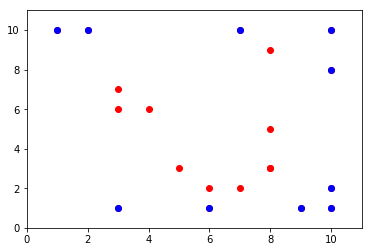

In [5]:
x_o = np.array([3,8,3,4,1,7,5,3,8,2,10,8,10,10,9,8,10,6,7,6])
y_o = np.array([7,3,1,6,10,10,3,6,5,10,10,9,8,2,1,3,1,1,2,2])

sample = maximum_distance_sampling(x_o, y_o, 10)
x_2 = []
y_2 = []
for pair in sample:
    x_2.append(pair[0])
    y_2.append(pair[1])

plt.scatter(x_o,y_o,c='red')
plt.scatter(x_2,y_2,c='blue')
plt.axis([0, 11, 0, 11])
plt.show()

You can clearly see that all the selected points (blue) lie at the edge of the space, as they are the furthest away typically. 

Now, try this for fun: try to code the other maximum distance sampling where the maximum minimal distance to the points in the sample is used.